<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2008_JNJ_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-01-01 18:28:00--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.162.101, 142.251.162.100, 142.251.162.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6vp0v616escqk9t9nv701557d25olmei/1672597650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d5b47e16-765a-48f0-a6d9-b1d044db0832 [following]
--2023-01-01 18:28:03--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6vp0v616escqk9t9nv701557d25olmei/1672597650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=d5b47e16-765a-48f0-a6d9-b1d044db0832
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.162.132, 2607:f8b0:400c:c38::84
Connecting to d

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/08年/JNJ_2008_Q3_20081014發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.00,proper noun,root,True,False,False,False
1,&,0.0,0.00,coordinating conjunction,coordinating conjunction,False,False,True,False
2,Johnson,0.0,0.00,proper noun,conjunct,True,False,False,False
3,(,0.0,0.00,punctuation,punctuation,False,False,True,False
4,NYSE,0.0,0.00,proper noun,appositional modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13565,have,0.0,0.00,verb,conjunct,True,True,False,False
13566,a,0.0,0.00,determiner,determiner,True,True,False,False
13567,great,0.8,0.75,adjective,adjectival modifier,True,False,False,False
13568,day,0.0,0.00,noun,direct object,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13570 entries, 0 to 13569
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          13570 non-null  object 
 1   Polarity      13570 non-null  float64
 2   Subjectivity  13570 non-null  float64
 3   Pos_          13570 non-null  object 
 4   Dep_          13565 non-null  object 
 5   Alpha         13570 non-null  bool   
 6   Stopword      13570 non-null  bool   
 7   Punct         13570 non-null  bool   
 8   Num           13570 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 583.2+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,Johnson,0.0,0.00,proper noun,root,True,False,False,False
2,Johnson,0.0,0.00,proper noun,conjunct,True,False,False,False
4,NYSE,0.0,0.00,proper noun,appositional modifier,True,False,False,False
6,JNJ,0.0,0.00,proper noun,modifier of nominal,True,False,False,False
10,Earnings,0.0,0.00,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13559,year,0.0,0.00,noun,modifier of nominal,True,False,False,False
13561,results,0.0,0.00,noun,object of preposition,True,False,False,False
13563,Thanks,0.2,0.20,noun,root,True,False,False,False
13567,great,0.8,0.75,adjective,adjectival modifier,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
10,Earnings,0.0,0.00,noun,compound,True,False,False,False
103,pleasure,0.0,0.00,noun,attribute,True,False,False,False
105,morning,0.0,0.00,noun,noun phrase as adverbial modifier,True,False,False,False
107,review,0.0,0.00,verb,open clausal complement,True,False,False,False
109,business,0.0,0.00,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13559,year,0.0,0.00,noun,modifier of nominal,True,False,False,False
13561,results,0.0,0.00,noun,object of preposition,True,False,False,False
13563,Thanks,0.2,0.20,noun,root,True,False,False,False
13567,great,0.8,0.75,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
105,morning,0.0,0.00,noun,noun phrase as adverbial modifier,True,False,False,False
110,results,0.0,0.00,noun,direct object,True,False,False,False
118,Joining,0.0,0.00,verb,root,True,False,False,False
123,today,0.0,0.00,noun,noun phrase as adverbial modifier,True,False,False,False
168,joining,0.0,0.00,verb,root,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13541,continued,0.0,0.00,verb,adjectival modifier,True,False,False,False
13550,forward,0.0,0.00,adverb,adverbial modifier,True,False,False,False
13563,Thanks,0.2,0.20,noun,root,True,False,False,False
13567,great,0.8,0.75,adjective,adjectival modifier,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
191,effective,0.600000,0.800000,adjective,adverbial clause modifier,True,False,False,False
229,available,0.400000,0.400000,adjective,object predicate,True,False,False,False
232,broader,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False
236,webcast,0.000000,0.000000,noun,adjectival modifier,True,False,False,False
254,briefly,0.000000,0.333333,adverb,adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
13520,excellent,1.000000,1.000000,adjective,adjectival modifier,True,False,False,False
13526,extraordinary,0.333333,1.000000,adjective,adjectival modifier,True,False,False,False
13541,continued,0.000000,0.000000,verb,adjectival modifier,True,False,False,False
13550,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    1213.000000
mean        0.055922
std         0.205248
min        -0.500000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    1213.000000
mean        0.242595
std         0.321391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
191,effective,0.600000,0.800000,adjective,adverbial clause modifier,True,False,False,False,Positive,Subjective
229,available,0.400000,0.400000,adjective,object predicate,True,False,False,False,Positive,Subjective
232,broader,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective
236,webcast,0.000000,0.000000,noun,adjectival modifier,True,False,False,False,Neutral,Objective
254,briefly,0.000000,0.333333,adverb,adverbial modifier,True,False,False,False,Neutral,Subjective
...,...,...,...,...,...,...,...,...,...,...,...
13520,excellent,1.000000,1.000000,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
13526,extraordinary,0.333333,1.000000,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
13541,continued,0.000000,0.000000,verb,adjectival modifier,True,False,False,False,Neutral,Objective
13550,forward,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,112
1,Neutral,Objective,673
2,Neutral,Subjective,138
3,Positive,Subjective,290


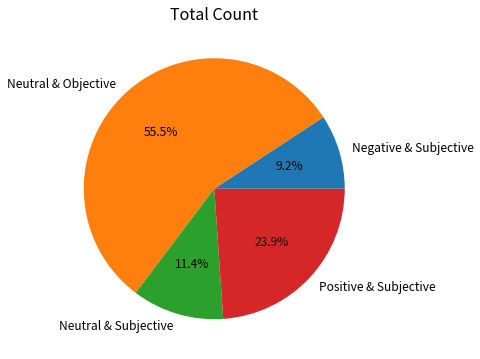

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

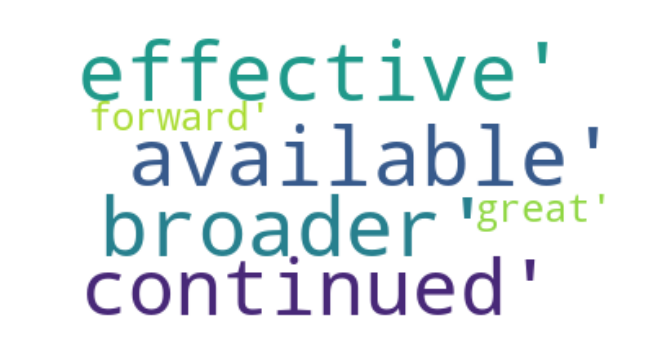

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,Johnson & Johnson (NYSE:JNJ) Q3 2008 Earnings ...,0.233333,0.300000
1,[Diverga] – Deutsche BankDavid Roman – Morgan ...,0.000000,0.000000
2,"Joining me on the podium today are Chris Poon,...",0.000000,0.000000
3,Also joining us today in the audience is Sheri...,0.000000,0.000000
4,"As we announced last week, effective January 1...",0.300000,0.433333
...,...,...,...
535,We continue to execute against these and other...,-0.172500,0.697500
536,We’re also innovating and building leadership ...,0.000000,0.000000
537,These successes are realized thanks to the exc...,0.511111,0.733333
538,Thank you for your continued support of Johnso...,0.350000,0.550000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    540.000000
mean       0.079662
std        0.188673
min       -0.800000
25%        0.000000
50%        0.000000
75%        0.159531
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    540.000000
mean       0.310637
std        0.267173
min        0.000000
25%        0.018750
50%        0.300000
75%        0.480208
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,Johnson & Johnson (NYSE:JNJ) Q3 2008 Earnings ...,0.233333,0.300000,Positive,Subjective
1,[Diverga] – Deutsche BankDavid Roman – Morgan ...,0.000000,0.000000,Neutral,Objective
2,"Joining me on the podium today are Chris Poon,...",0.000000,0.000000,Neutral,Objective
3,Also joining us today in the audience is Sheri...,0.000000,0.000000,Neutral,Objective
4,"As we announced last week, effective January 1...",0.300000,0.433333,Positive,Subjective
...,...,...,...,...,...
535,We continue to execute against these and other...,-0.172500,0.697500,Negative,Subjective
536,We’re also innovating and building leadership ...,0.000000,0.000000,Neutral,Objective
537,These successes are realized thanks to the exc...,0.511111,0.733333,Positive,Subjective
538,Thank you for your continued support of Johnso...,0.350000,0.550000,Positive,Subjective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,97
1,Neutral,Objective,135
2,Neutral,Subjective,65
3,Positive,Subjective,243


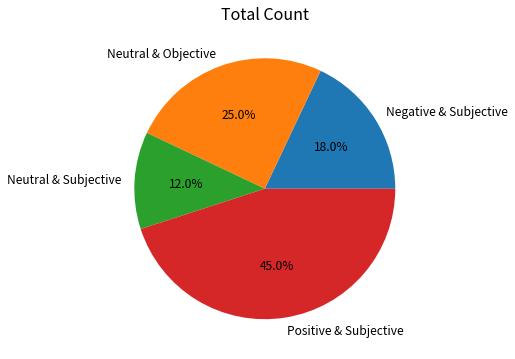

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]
plt.figure(figsize=(20,6)) 
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

#查看句子

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

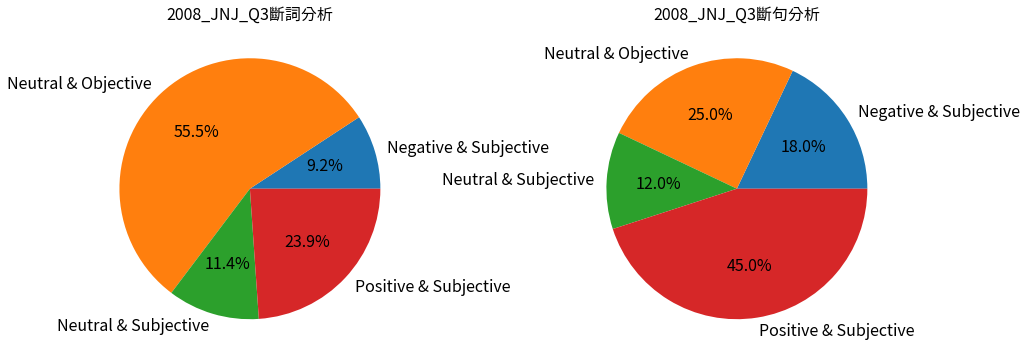

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective", "Positive & Subjective"]



axs[0].pie(size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2008_JNJ_Q3斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2008_JNJ_Q3斷句分析', fontsize=16)


plt.savefig("2008_JNJ_Q3.png")
from google.colab import files
files.download("2008_JNJ_Q3.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html
